# Text mining & Search Project

### Università degli Studi di Milano-Bicocca  2020/2021

**Luzzi Federico** 816753 **Peracchi Marco** 800578

# Text Classification

In this notebook it's possible to visualize text classification applyed by using different machine learning classifiers.

In [48]:
import os
import pandas as pd
import numpy as np
import pickle

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [50]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [51]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers 

In [52]:
# confusion matrix plot
def c_matrix(y_val, y_pred, classes):
    cm = confusion_matrix(y_val, y_pred)
    fig, ax= plt.subplots(figsize = (8,6))
    sns.heatmap(cm, annot=True, annot_kws={"size": 10},
              linewidths=.2, fmt="d", cmap="PuBu")
    plt.xlabel("Predicted Class", size = 12, horizontalalignment="right")
    plt.ylabel("True Class", size = 12)
    ax.set_yticklabels(classes, rotation = 45, fontdict= {'fontsize': 10})
    ax.set_xticklabels(classes, rotation = 30, fontdict= {'fontsize': 10})
    plt.title("Confusion matrix", size = 20)
    plt.show()

In [43]:
def loss_plotter(history):
    fig = plt.figure(figsize=(6,8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history["loss"], label = "Train loss",
             color = "forestgreen")
    plt.plot(history.history["val_loss"], label= "Validation loss",
             color = "orange")
    plt.legend(loc='upper right', fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel('Epochs', size = 15)
    plt.ylabel('Value', size = 15)
    plt.title("Loss function", size =20)
    plt.show()
    fig = plt.figure(figsize=(6,8))
    plt.subplot(2, 1, 2)
    plt.plot(history.history["acc"], label = "Train accuracy",
             color = "forestgreen")
    plt.plot(history.history["val_acc"], label= "Validation accuracy",
             color = "orange")
    plt.legend(fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel('Epochs', size = 15)
    plt.ylabel('Value', size = 15)
    plt.title("Accuracy function", size =20)
    plt.show()

In [53]:
if 'featured_data.csv' not in os.listdir('data'):
    print("!!! ERROR !!!\n --- Before this, execute 03-Features_extraction Notebook ---")
else:
    df = pd.read_csv("data/featured_data.csv", sep = ",")
    print("Features loaded --- DONE")

Features loaded --- DONE


### Load Tf-idf Vectorization

In [54]:
tfidf = np.load("data/representations/tf-idf.npy", allow_pickle=True)

In [55]:
tfidf.shape

(24781, 4000)

## Feature extraction and splitting data

In [56]:
X_data = tfidf
Y_data = df["class"]

# verifica dimensioni vettori
assert X_data.shape[0] == Y_data.shape[0]

In [57]:
# class weights
# w_J = n_samples / (n_classes * n_samples_J)
weights = len(df['class']) / (3 * df['class'].value_counts())

# split train-test
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,
                                                   test_size = 0.2,
                                                   random_state = 42,
                                                   shuffle = True,
                                                   stratify = Y_data)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

### Class weights
Computing class weights as follows

$w_j = \frac{num\_samples}{num\_classes \cdot num\_samples_j}$

## Models with performances

### Support Vector Machine

In [58]:
# model
model = SVC(random_state = 42, 
            class_weight= {0 : weights[0], 1 : weights[1], 2 : weights[2]})

In [59]:
%%time
# fitting
model.fit(X_train, y_train)
print("Modelling --- DONE")

Modelling --- DONE
Wall time: 24min 41s


In [34]:
# save model
filename = 'svm.sav'
pickle.dump(model, open(f'models/base/{filename}', 'wb'))

In [35]:
# load model
filename = 'svm.sav'
model = pickle.load(open(f'models/base/{filename}', 'rb'))

Performance on TRAIN:
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1144
           1       1.00      0.94      0.97     15351
           2       0.87      0.99      0.93      3329

    accuracy                           0.96     19824
   macro avg       0.87      0.98      0.92     19824
weighted avg       0.96      0.96      0.96     19824



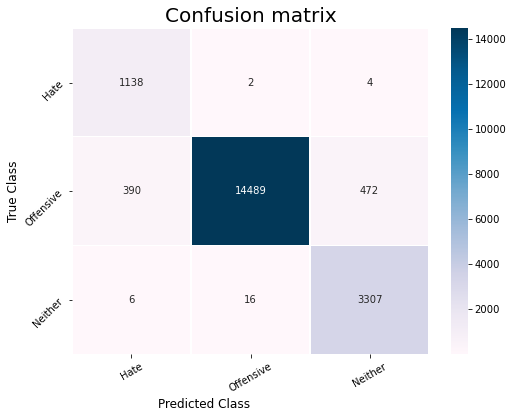

Wall time: 17min 25s


In [60]:
%%time
# performance on TRAIN
print("Performance on TRAIN:")
y_pred = model.predict(X_train)   
print('Classification report:')
print(classification_report(y_train, y_pred))
c_matrix(y_train, y_pred, ["Hate", "Offensive", "Neither"])

Classification report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43       286
           1       0.96      0.92      0.94      3838
           2       0.81      0.96      0.88       833

    accuracy                           0.90      4957
   macro avg       0.73      0.77      0.75      4957
weighted avg       0.90      0.90      0.90      4957



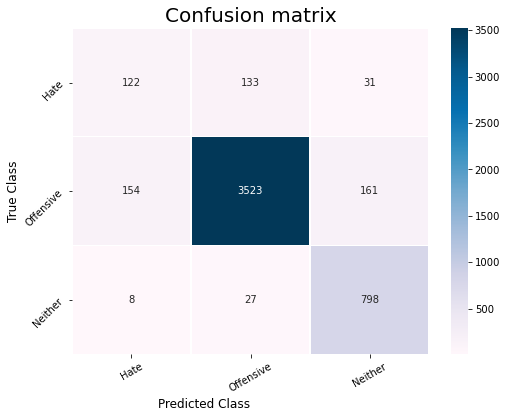

Wall time: 4min 23s


In [61]:
%%time
# performance on TEST
y_pred = model.predict(X_test)   
print('Classification report:')
print(classification_report(y_test, y_pred))
c_matrix(y_test, y_pred, ["Hate", "Offensive", "Neither"]) 

### Adaboost

In [11]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=0)

In [12]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [13]:
# save model
filename = 'adaboost.sav'
pickle.dump(adaboost, open(f'models/base/{filename}', 'wb'))

NameError: name 'model' is not defined

Classification report:
              precision    recall  f1-score   support

           0       0.52      0.19      0.27      1144
           1       0.94      0.95      0.95     15351
           2       0.82      0.94      0.87      3329

    accuracy                           0.91     19824
   macro avg       0.76      0.69      0.70     19824
weighted avg       0.89      0.91      0.90     19824



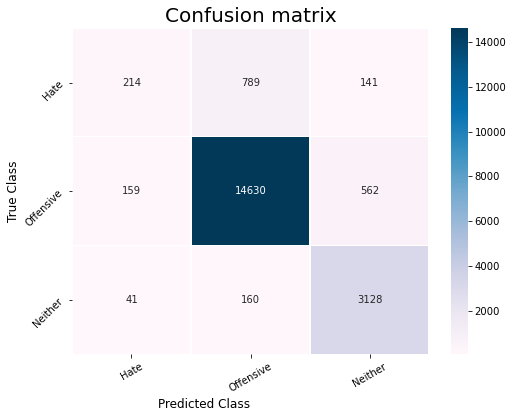

Wall time: 19.8 s


In [14]:
%%time
# performance on TRAIN
y_pred = adaboost.predict(X_train)   
print('Classification report:')
print(classification_report(y_train, y_pred))
c_matrix(y_train, y_pred, ["Hate", "Offensive", "Neither"]) 

Classification report:
              precision    recall  f1-score   support

           0       0.49      0.18      0.26       286
           1       0.94      0.95      0.94      3838
           2       0.82      0.93      0.87       833

    accuracy                           0.90      4957
   macro avg       0.75      0.69      0.69      4957
weighted avg       0.89      0.90      0.89      4957



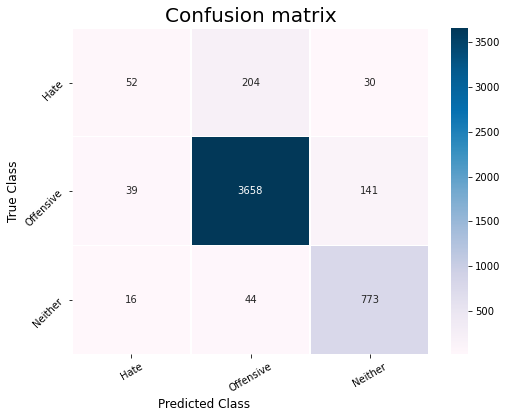

Wall time: 4.8 s


In [15]:
%%time
# performance on TEST
y_pred = adaboost.predict(X_test)   
print('Classification report:')
print(classification_report(y_test, y_pred))
c_matrix(y_test, y_pred, ["Hate", "Offensive", "Neither"]) 

### Logistic Regression

In [16]:
model = LogisticRegression(random_state = 42, max_iter = 1000,
            class_weight= {0 : weights[0], 1 : weights[1], 2 : weights[2]})

In [17]:
%%time
# fitting
model.fit(X_train, y_train)
print("Modelling --- DONE")

Modelling --- DONE
Wall time: 20.3 s


In [ ]:
# save model
filename = 'logistic.sav'
pickle.dump(model, open(f'models/base/{filename}', 'wb'))

Performance on TRAIN:
Classification report:
              precision    recall  f1-score   support

           0       0.44      0.95      0.60      1144
           1       0.99      0.87      0.93     15351
           2       0.82      0.97      0.89      3329

    accuracy                           0.89     19824
   macro avg       0.75      0.93      0.81     19824
weighted avg       0.93      0.89      0.90     19824



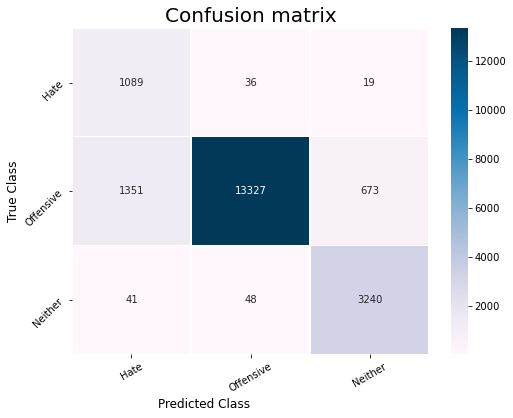

Wall time: 449 ms


In [18]:
%%time
# performance on TRAIN
print("Performance on TRAIN:")
y_pred = model.predict(X_train)   
print('Classification report:')
print(classification_report(y_train, y_pred))
c_matrix(y_train, y_pred, ["Hate", "Offensive", "Neither"])

Classification report:
              precision    recall  f1-score   support

           0       0.30      0.64      0.41       286
           1       0.97      0.85      0.91      3838
           2       0.79      0.94      0.86       833

    accuracy                           0.85      4957
   macro avg       0.69      0.81      0.72      4957
weighted avg       0.90      0.85      0.87      4957



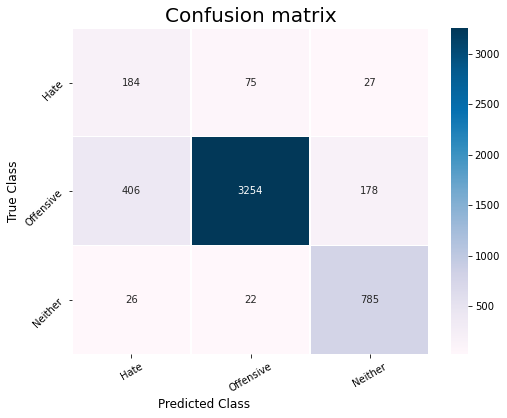

Wall time: 318 ms


In [19]:
%%time
# performance on TEST
y_pred = model.predict(X_test)   
print('Classification report:')
print(classification_report(y_test, y_pred))
c_matrix(y_test, y_pred, ["Hate", "Offensive", "Neither"]) 

### Random Forest

In [20]:
model = RandomForestClassifier(random_state = 42,
            class_weight= {0 : weights[0], 1 : weights[1], 2 : weights[2]})

In [21]:
%%time
# fitting
model.fit(X_train, y_train)
print("Modelling --- DONE")

Modelling --- DONE
Wall time: 2min 29s


In [ ]:
# save model
filename = 'random_forest.sav'
pickle.dump(model, open(f'models/base/{filename}', 'wb'))

Performance on TRAIN:
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1144
           1       1.00      0.99      1.00     15351
           2       0.99      1.00      0.99      3329

    accuracy                           0.99     19824
   macro avg       0.98      1.00      0.99     19824
weighted avg       0.99      0.99      0.99     19824



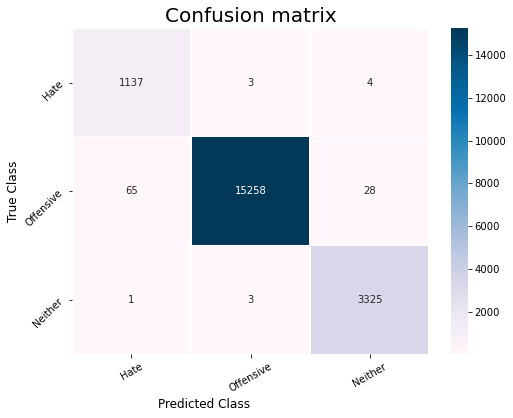

Wall time: 4.09 s


In [22]:
%%time
# performance on TRAIN
print("Performance on TRAIN:")
y_pred = model.predict(X_train)   
print('Classification report:')
print(classification_report(y_train, y_pred))
c_matrix(y_train, y_pred, ["Hate", "Offensive", "Neither"])

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.26      0.34       286
           1       0.94      0.95      0.94      3838
           2       0.85      0.91      0.88       833

    accuracy                           0.91      4957
   macro avg       0.76      0.71      0.72      4957
weighted avg       0.90      0.91      0.90      4957



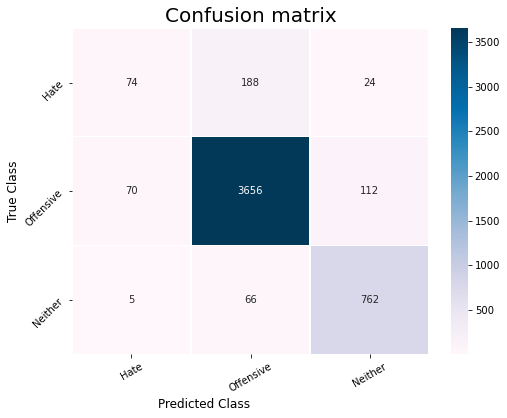

Wall time: 2.32 s


In [23]:
%%time
# performance on TEST
y_pred = model.predict(X_test)   
print('Classification report:')
print(classification_report(y_test, y_pred))
c_matrix(y_test, y_pred, ["Hate", "Offensive", "Neither"]) 

### Neural Network

In [24]:
Y_data_bin = keras.utils.to_categorical(Y_data)

X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_data, Y_data_bin,
                                                   test_size = 0.2,
                                                   random_state = 42,
                                                   shuffle = True,
                                                   stratify = Y_data)

In [25]:
def neural_network(dims, seed):
    model = Sequential()
    model.add(Dense(64, input_shape = (dims,), 
                    activation = 'relu',
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax',
                    kernel_regularizer = regularizers.l2(1e-4)))

    model.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(lr=0.0001),
                 metrics=['acc'])
    return model

def neural_network_2(dims, seed):
    model = Sequential()
    model.add(Dense(128, input_shape = (dims,), 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_shape = (dims,), 
                    activation = 'relu',
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax', 
                    kernel_regularizer = regularizers.l2(1e-4)))

    model.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(lr=0.0001),
                 metrics=['acc'])
    return model

def neural_network_3(dims, seed):
    model = Sequential()
    model.add(Dense(1024, input_shape = (dims,), 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(256, input_shape = (dims,), 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(128, input_shape = (dims,), 
                    activation = 'relu', 
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_shape = (dims,), 
                    activation = 'relu',
                    kernel_regularizer = regularizers.l2(1e-4)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax', 
                    kernel_regularizer = regularizers.l2(1e-4)))

    model.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(lr=0.0001),
                 metrics=['acc'])
    return model

In [26]:
def checkpoint(checkpoint_filepath):
    model_checkpoint = keras.callbacks.ModelCheckpoint(
                    filepath=checkpoint_filepath,
                    save_weights_only=True,
                    monitor='val_loss',
                    mode='auto',
                    save_best_only=True)
    return model_checkpoint

In [41]:
dims = X_data.shape[1]
seed = 42
batch_s = 32
epochs_n = 20

model = neural_network_3(dims, seed)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              4097024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [42]:
%%time
history = model.fit(X_train, y_train_bin, 
                    batch_size=batch_s, 
                    epochs=epochs_n, 
                    verbose=1,
                    validation_split = 0.2,
                    class_weight = {0 : weights[0], 1 : weights[1], 2 : weights[2]},
                    callbacks = [checkpoint("models/base/nn_3.h5")])

Epoch 1/20
496/496 [==============================] - 28s 56ms/step - loss: 1.2401 - acc: 0.5529 - val_loss: 1.1710 - val_acc: 0.8517
Epoch 2/20
496/496 [==============================] - 28s 57ms/step - loss: 1.0739 - acc: 0.7237 - val_loss: 0.6789 - val_acc: 0.8451
Epoch 3/20
496/496 [==============================] - 26s 53ms/step - loss: 0.7232 - acc: 0.7956 - val_loss: 0.6415 - val_acc: 0.8151
Epoch 4/20
496/496 [==============================] - 26s 52ms/step - loss: 0.5524 - acc: 0.8347 - val_loss: 0.5606 - val_acc: 0.8363
Epoch 5/20
496/496 [==============================] - 39s 78ms/step - loss: 0.4574 - acc: 0.8616 - val_loss: 0.5801 - val_acc: 0.8275
Epoch 6/20
496/496 [==============================] - 38s 77ms/step - loss: 0.3971 - acc: 0.8760 - val_loss: 0.5360 - val_acc: 0.8540
Epoch 7/20
496/496 [==============================] - 40s 80ms/step - loss: 0.3460 - acc: 0.8987 - val_loss: 0.5633 - val_acc: 0.8462
Epoch 8/20
496/496 [==============================] - 39s 78ms

In [44]:
# load model 1
filename = 'nn_1.h5'
model = neural_network(dims,seed)
model.load_weights(f'models/base/{filename}')

In [ ]:
# load model 2
filename = 'nn_2.h5'
model = neural_network_2(dims,seed)
model.load_weights(f'models/base/{filename}')

In [ ]:
# load model 3
filename = 'nn_3.h5'
model = neural_network_3(dims,seed)
model.load_weights(f'models/base/{filename}')

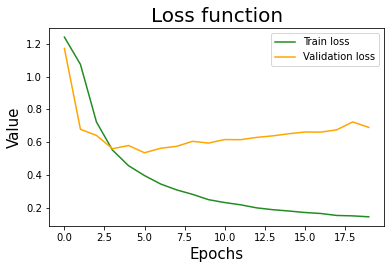

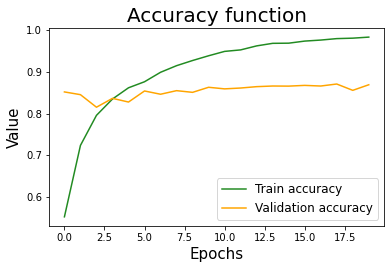

In [45]:
loss_plotter(history)

Classification report:
              precision    recall  f1-score   support

           0       0.44      0.90      0.59      1144
           1       0.99      0.89      0.94     15351
           2       0.88      0.96      0.92      3329

    accuracy                           0.90     19824
   macro avg       0.77      0.92      0.82     19824
weighted avg       0.94      0.90      0.92     19824



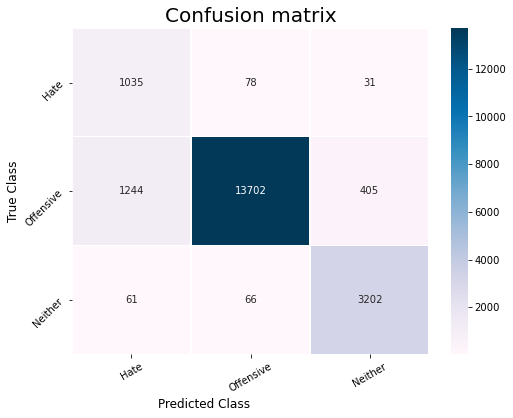

Wall time: 11.6 s


In [46]:
%%time
# performance on TRAIN
y_pred = np.argmax(model.predict(X_train), axis = 1)
y_train_n = np.argmax(y_train_bin, axis = 1)
print('Classification report:')
print(classification_report(y_train_n, y_pred))
c_matrix(y_train_n, y_pred, ["Hate", "Offensive", "Neither"])

Classification report:
              precision    recall  f1-score   support

           0       0.28      0.57      0.38       286
           1       0.96      0.85      0.90      3838
           2       0.79      0.91      0.84       833

    accuracy                           0.85      4957
   macro avg       0.68      0.78      0.71      4957
weighted avg       0.89      0.85      0.86      4957



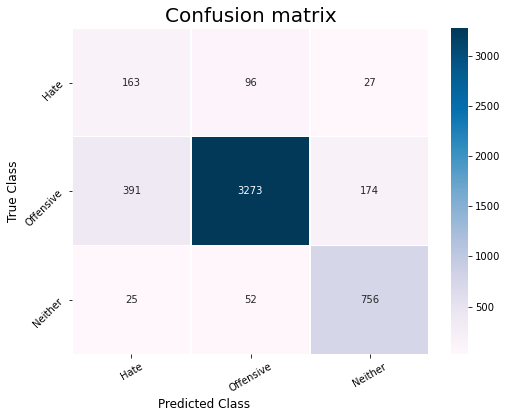

Wall time: 3.87 s


In [47]:
%%time
# performance on TEST
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_test_n = np.argmax(y_test_bin, axis = 1)
print('Classification report:')
print(classification_report(y_test_n, y_pred))
c_matrix(y_test_n, y_pred, ["Hate", "Offensive", "Neither"])